<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/IDA/1_5_Data_visualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
from kagglehub import KaggleDatasetAdapter

## Load the Data

In [32]:
import os

dataset_path = kagglehub.dataset_download("albertobircoci/support-ticket-priority-dataset-50k")
print("Path to dataset files:", dataset_path)

support_ticket_data = pd.read_csv(os.path.join(dataset_path, "Support_tickets.csv"))

Using Colab cache for faster access to the 'support-ticket-priority-dataset-50k' dataset.
Path to dataset files: /kaggle/input/support-ticket-priority-dataset-50k


In [38]:
print(support_ticket_data.columns)

Index(['ticket_id', 'day_of_week', 'day_of_week_num', 'company_id',
       'company_size', 'company_size_cat', 'industry', 'industry_cat',
       'customer_tier', 'customer_tier_cat', 'org_users', 'region',
       'region_cat', 'past_30d_tickets', 'past_90d_incidents', 'product_area',
       'product_area_cat', 'booking_channel', 'booking_channel_cat',
       'reported_by_role', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment', 'customer_sentiment_cat', 'description_length',
       'priority', 'priority_cat'],
      dtype='object')


In [61]:
df_support = support_ticket_data[['day_of_week_num', 'company_size_cat', 'industry_cat', 'priority_cat', 'region_cat', 'customer_tier_cat', 'customers_affected']]
feature_names = support_ticket_data.columns[:5]

df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   day_of_week_num     50000 non-null  int64
 1   company_size_cat    50000 non-null  int64
 2   industry_cat        50000 non-null  int64
 3   priority_cat        50000 non-null  int64
 4   region_cat          50000 non-null  int64
 5   customer_tier_cat   50000 non-null  int64
 6   customers_affected  50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [62]:
# унікальні класи
print("Unique classes:", set(df_support['priority_cat']))  # або 'priority_cat' для числового варіанту
print(":", set(df_support['industry_cat']))
print(":", set(df_support['company_size_cat']))
print(":", set(df_support['day_of_week_num']))
print(":", set(df_support['region_cat']))
print("Unique classes:", set(df_support['customer_tier_cat']))  # або 'priority_cat' для числового варіанту
print("Unique classes:", set(df_support['customers_affected']))

# якщо хочеш "людинозрозумілі" назви класів
print("Class names:", support_ticket_data['priority_cat'].unique())
print("Class names:", support_ticket_data['industry_cat'].unique())
print("Class names:", support_ticket_data['company_size_cat'].unique())
print("Class names:", support_ticket_data['day_of_week_num'].unique())
print("Class names:", support_ticket_data['region_cat'].unique())
print("Class names:", support_ticket_data['customer_tier_cat'].unique())
print("Class names:", support_ticket_data['customers_affected'].unique())



Unique classes: {1, 2, 3}
: {1, 2, 3, 4, 5, 6, 7}
: {1, 2, 3}
: {1, 2, 3, 4, 5, 6, 7}
: {1, 2, 3}
Unique classes: {1, 2, 3}
Unique classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

# Pairwise correlation of columns

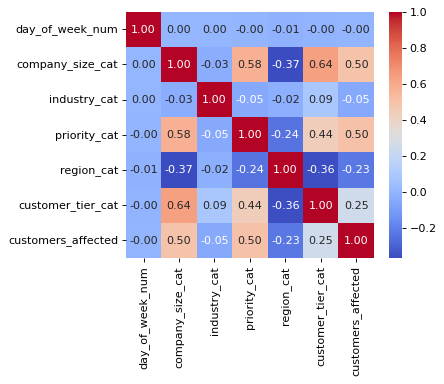

In [63]:
corr = df_support.corr()
fig, ax = plt.subplots(figsize=(5, 4), dpi = 80)
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()
# This heatmap shows the correlation between all numeric features in the wine dataset.
# Values close to 1 indicate a strong positive relationship, values close to -1 indicate a strong negative relationship,
# and values near 0 mean little or no linear correlation.
# Correlation with the target can be useful, because it shows which features are most related to the class labels.
#However, strong correlation between features themselves may cause multicollinearity,
#which can be a problem for some machine learning models.

## Boxplots
for more examples see https://seaborn.pydata.org/generated/seaborn.boxplot.html

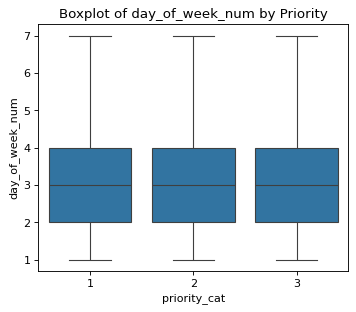

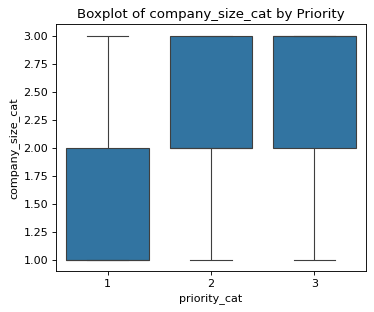

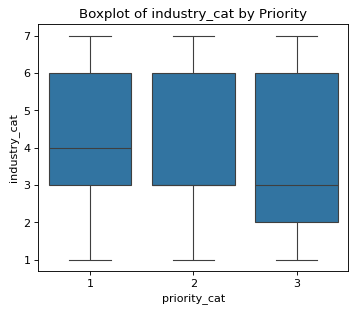

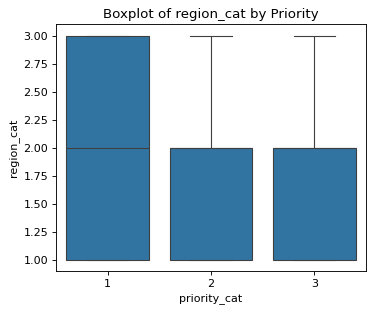

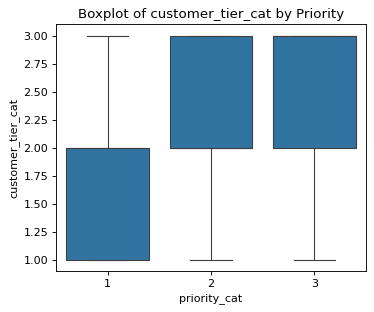

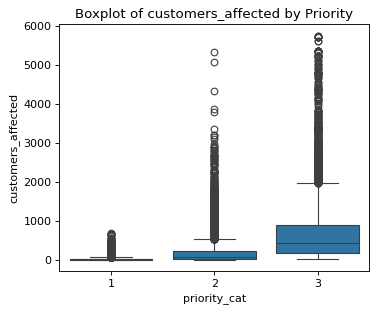

In [68]:
features_name = ['day_of_week_num', 'company_size_cat', 'industry_cat', 'region_cat', 'customer_tier_cat', 'customers_affected']

for i in range(len(features_name)):
    plt.figure(figsize=(5, 4), dpi=80)
    ax = sns.boxplot(x='priority_cat', y=features_name[i], data=support_ticket_data)
    plt.title(f"Boxplot of {features_name[i]} by Priority")
    plt.show()


# Each boxplot compares the distribution of a single feature across the three wine classes.
# The box shows the interquartile range (IQR), the line inside is the median, and the whiskers/outliers indicate variability.
# If the boxes for different classes do not overlap much, it means that this feature is a good candidate for distinguishing between wine types.

## Pairplot
for more examples see
https://seaborn.pydata.org/generated/seaborn.pairplot.html

KeyboardInterrupt: 

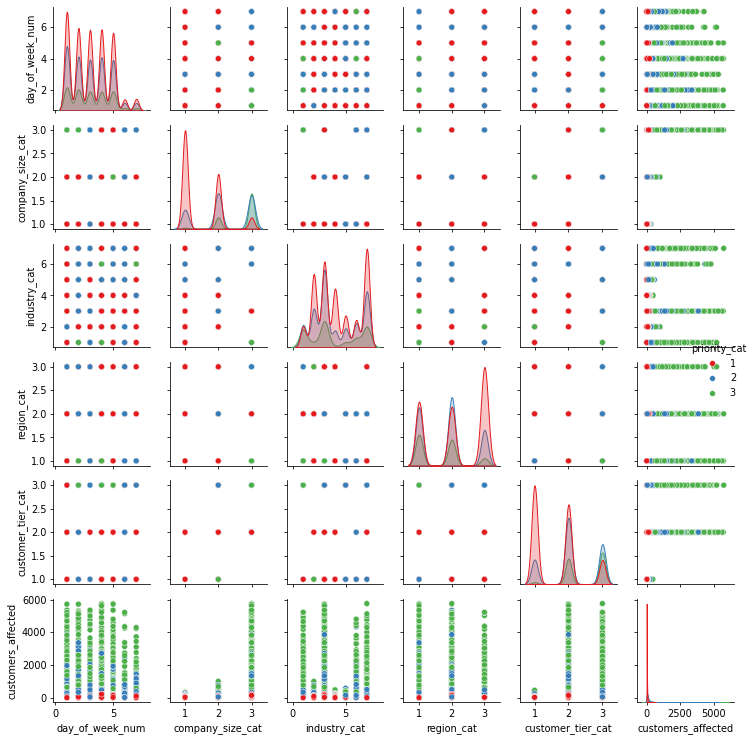

In [70]:
plt.rcParams['figure.dpi'] = 70   # дефолт ~100, для зменшеня розміру зображення
sns.pairplot(df_support, hue="priority_cat", palette = 'Set1',  height=1.8)
plt.show()
#The pairplot shows scatterplots for every pair of features, colored by the wine class.
# This helps us visually check if classes are separable in 2D feature spaces and also reveals potential correlations or clusters.
# Diagonal plots show the distribution (histogram/density) of each single feature.

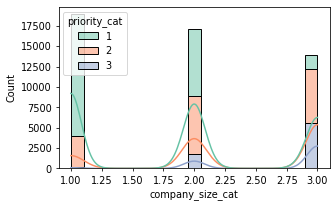

In [72]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_support, x="company_size_cat", hue="priority_cat", kde=True, multiple="stack", palette = 'Set2')
plt.show()
# This shows the distribution of one feature (alcohol) for each wine class.
# Overlaps indicate similarities, while clear separation suggests this feature helps classification.
# kde=True adds a smooth density curve on top of the histogram

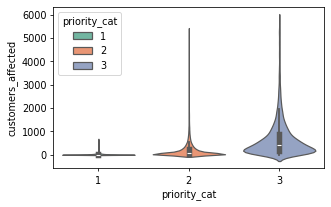

In [73]:
plt.figure(figsize=(5,3))
sns.violinplot(x="priority_cat", y="customers_affected", hue="priority_cat",
               data=df_support, palette="Set2")
plt.show()
#A violin plot combines a boxplot with a density curve, so you can see both the summary
# statistics and the shape of the distribution for each class.